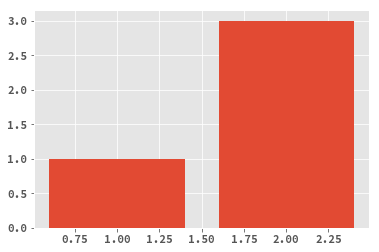

In [1]:
# リスト4.5.1：棒グラフの描画
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)
x = [1, 2]
y = [1, 3]
ax.bar(x, y)
plt.show()

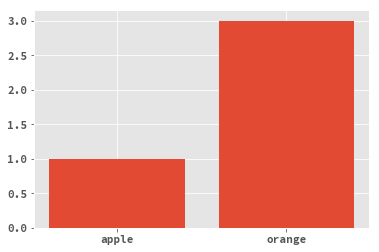

In [2]:
# リスト4.5.2：目盛りラベルを設定した棒グラフの描画
# 横軸の目盛りにラベルを設定
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ['apple', 'orange']
ax.bar(x, y, tick_label=labels)
plt.show()

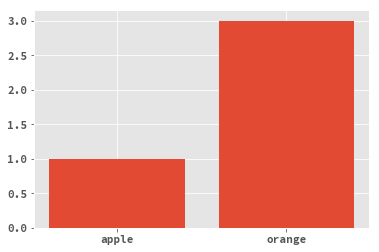

In [3]:
# リスト4.5.3：描画後に文字列ラベルを追加
# 描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x, y)
# X軸の軸目盛りと軸目盛りラベル
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

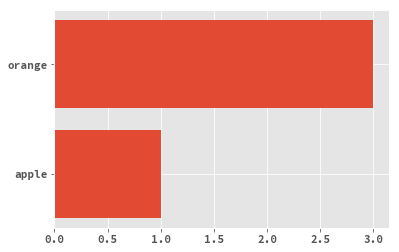

In [4]:
# リスト4.5.4：横向きの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(x, y, tick_label=labels)
plt.show()

In [5]:
# リスト4.5.5：anime_master.csvファイルの読み込み
import os
import pandas as pd
base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
dfac = pd.read_csv(anime_master_csv)
dfac.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


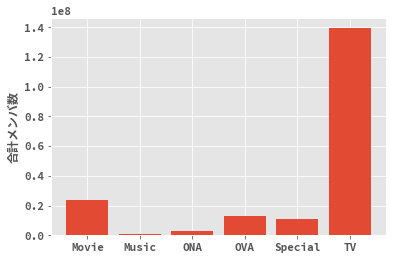

In [6]:
# リスト4.5.6：配給種別ごとの合計メンバ数の棒グラフを描画
fig = plt.figure()
ax = fig.add_subplot(111)
y = dfac.groupby('type').sum()['members']
x = range(len(y))
xlabels = y.index
ax.bar(x, y, tick_label=xlabels)
ax.set_ylabel('合計メンバ数')
plt.show()

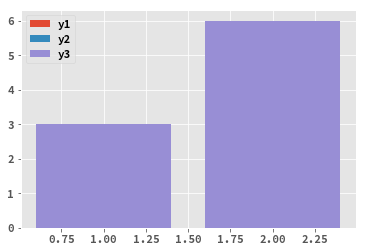

In [7]:
# リスト4.5.7：複数グループの棒グラフを描画 （失敗例）
import numpy as np
# データセットの作成
x = [1, 2]
y1, y2, y3 = [1, 2], [2, 4], [3, 6]
# 複数グループの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
w = 0.2
ax.bar(x, y1, label='y1')
ax.bar(x, y2, label='y2')
ax.bar(x, y3, label='y3')
ax.legend()
plt.show()

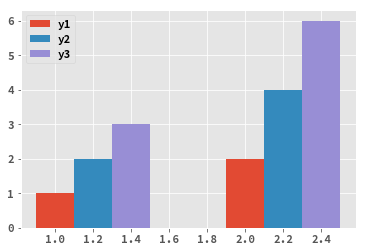

In [8]:
# リスト4.5.8：複数グループの棒グラフの描画
# 複数グループの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
w = 0.2
ax.bar(x, y1, width=w, label='y1')
ax.bar(np.array(x) + w, y2, width=w, label='y2')
ax.bar(np.array(x) + w * 2, y3, width=w, label='y3')
ax.legend()
plt.show()

In [9]:
# リスト4.5.9：anime_genre_top10_pivoted.csvファイルの読み込み
base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_genre_top10_pivoted_csv = os.path.join(base_url, 'anime_genre_top10_pivoted.csv')
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')
dfag

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


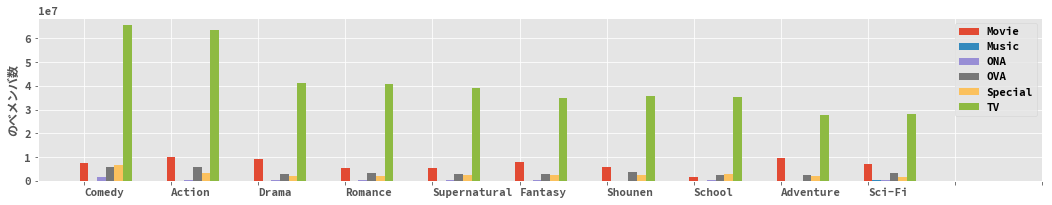

In [10]:
# リスト4.5.10：配給種別・ジャンル別棒グラフの描画
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)
wt = np.array(range(len(dfag)))
w = 0.1
for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('のべメンバ数')
ax.legend()
plt.show()

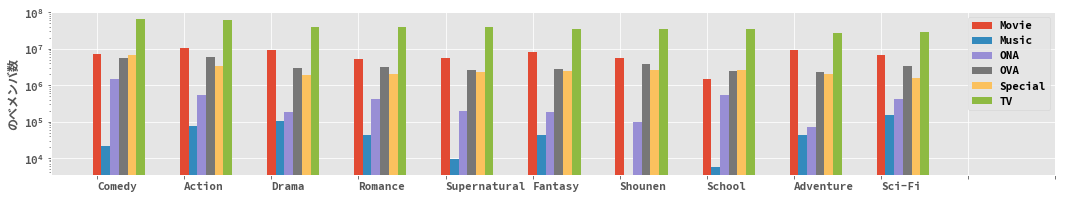

In [11]:
# リスト4.5.11：配給種別・ジャンル別棒グラフの描画 （対数軸）
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)
wt = np.array(range(len(dfag)))
w = 0.1
for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('のべメンバ数')
ax.set_yscale('log')
ax.legend()
plt.show()

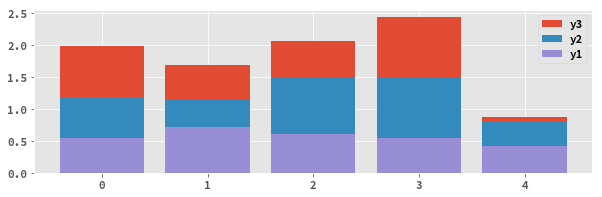

In [12]:
# リスト4.5.12：積み上げ棒グラフの描画
# データセットの作成
x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape((3, 5))
y1, y2, y3 = y
y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)
# 積み上げ棒グラフの描画
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')
ax.legend()
plt.show()

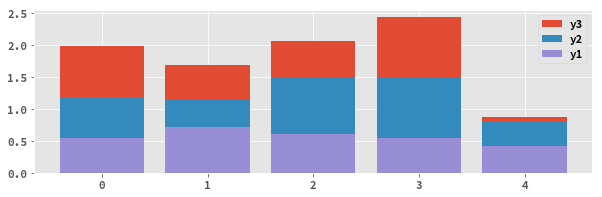

In [13]:
# リスト4.5.13：bottomオプションを用いて積み上げ棒グラフを描画
figure = plt.figure(figsize=(10, 3))
ax = figure.add_subplot(111)
ax.bar(x, y3, bottom=y2b, label='y3')
ax.bar(x, y2, bottom=y1, label='y2')
ax.bar(x, y1, label='y1')
ax.legend()
plt.show()

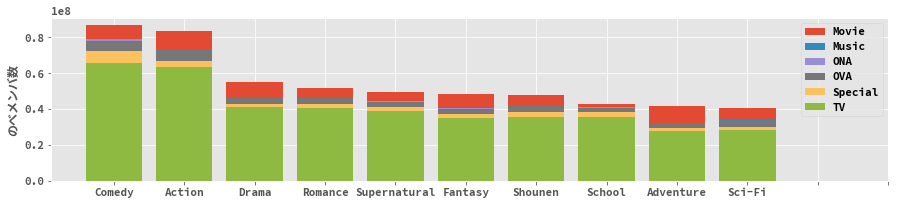

In [14]:
# リスト4.5.14：配給種別・ジャンル別積み上げ棒グラフの描画
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
rows, cols = len(dfag), len(dfag.columns)
x = range(rows)
for i, t in enumerate(dfag.columns):
    # i列目から最終列までの和を計算
    y = dfag.iloc[:, i:cols].sum(axis=1)
    ax.bar(x, y, label=t)
ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel('のべメンバ数')
ax.legend()
plt.show()